## Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

### Sebelum Data Cleaning

In [ ]:
data = pd.read_csv('./datasets/default/train.csv')
data

,label,tweet
0,fear,Lebih menyeramkan kalo punya grup WA keluarga ...
1,joy,"Hepibesdey canteeeekk [USERNAME] panjang umur,..."
2,joy,Jumat lalu nonton inih! Selain tertarik settin...
3,joy,Nyante dulu.. Sruput kopi biar tambah bijak...
4,love,Happy annyversarry yg pertama kalinya .. Trsra...
...,...,...
4148,anger,sini berobat sama saya ini ngantri dokter saja...
4149,joy,Selamat pagi generasi Tik Tok yang kadang kepa...
4150,love,"Salah satu sahabat terbaik! Teman, kakak, insp..."
4151,anger,[USERNAME] Gila kok ada ya perempuan pikiranny...


In [ ]:
# Ambil satu data representatif untuk setiap label
representative_data = []

# Loop melalui setiap label unik dalam kolom "label"
for label in data["label"].unique():
    # Ambil satu data dengan label tersebut
    representative_data.append(data[data["label"] == label].iloc[0])

# Tampilkan data representatif untuk tiap label
for data in representative_data:
    print("Label:", data["label"])
    print("Tweet:", data["tweet"])
    print("\n")


Label: fear
Tweet: Lebih menyeramkan kalo punya grup WA keluarga yg isinya sharing2 hadist & ayat Al-Qur'an DAN grup WA lingkungan paroki gereja.... Serem kalo salah reply


Label: joy
Tweet: Hepibesdey canteeeekk [USERNAME] panjang umur, jadi pribadi yang jauh lebih baik, semoga apa yang di cita-citakan terwujud dan langgeng sama [USERNAME]


Label: love
Tweet: Happy annyversarry yg pertama kalinya .. Trsrah org mau blng apa, aku gk pdli.. Ini yg aku rasain slma 1blan.. Aku cukup bhagia sm km smuanya baik" aja, jgn ada mslh yy sayang, cemburu krna org lain wajarkan.. Dan smg kita juga makin mngrti satu sama lain.


Label: sadness
Tweet: beli kaos banyak dengan ukuran yg udah downgrade, kucariin kok ngga ada ternyata masuk ke lemari Bapak, mbak ART ku kayaknya ga notice aku udah kurusan.


Label: anger
Tweet: [USERNAME] tolong aplikasinya diberesin. Saya tadi pesan, katanya server error. Eh muncul 4 taksi. Khan kasian drivernya, saya musti cancel.




### Setelah Data Cleaning

In [ ]:
data = pd.read_csv('./datasets/no_duplicate/train.csv')


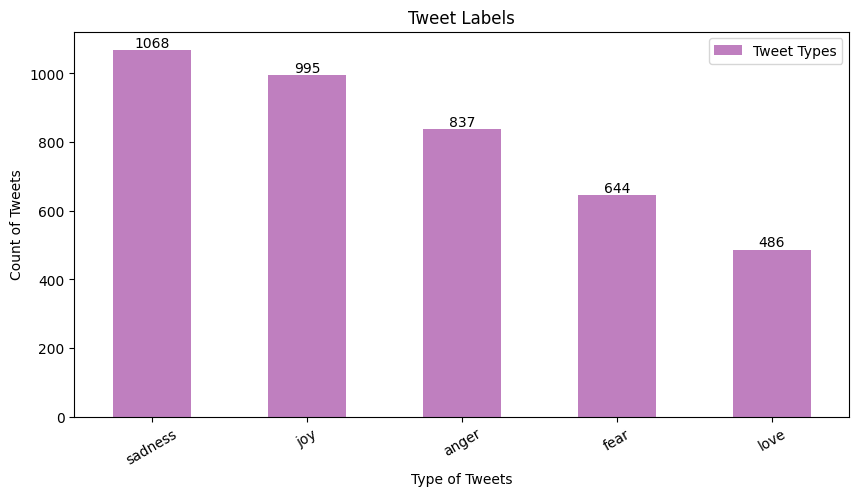

In [ ]:
# Bar graph of `Types of Tweet Emotions` in the Data
plt.figure(figsize=(10,5))
ax = data["label"].value_counts().plot(kind="bar", label="Tweet Types", color="purple", alpha=0.5)
plt.title("Tweet Labels")
plt.xlabel("Type of Tweets")
plt.ylabel("Count of Tweets")
plt.legend(loc="upper right")
plt.xticks(rotation=30)

# Add counts above each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
    
plt.show()

## Word Cloud

In [ ]:
!pip install wordcloud

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [ ]:
data = pd.read_csv('./datasets/no_duplicate/train.csv')
data

,label,tweet
0,fear,seram grup keluarga isi sharing hadist ayat qu...
1,joy,selamat ulang cantik umur pribadi moga cita ci...
2,joy,jumat tonton tarik ting jogja penasaran baca b...
3,joy,santai minum kopi biar bijak
4,love,hapy aniversary serah bilang peduli rasain bla...
...,...,...
4025,anger,obat antri dokter antri sembako
4026,joy,selamat pagi generasi tik tok kadang kepala su...
4027,love,salah sahabat teman kakak inspirasi lihat pras...
4028,anger,gila perempuan pikiranya nyinyir loh korban le...


In [ ]:
data['label'].value_counts()

sadness    1068
joy         995
anger       837
fear        644
love        486
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import pandas as pd

def generate_word_statistics(data, label):
    label_data = data.loc[data['label'] == label]
    label_data['tweet'] = label_data['tweet'].apply(lambda x: str(x))

    text = ' '.join(label_data['tweet'])
    
    # Tokenize the text to count word frequency
    words = text.split()
    word_counts = Counter(words)
    
    # Create a DataFrame from word frequencies
    word_freq_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])
    word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)
    
    # Calculate the total number of words in the label
    total_words = len(words)
    
    # Print the frequency and percentage of the top 7 word frequencies
    print(f"Top 7 Words for {label} Label:")
    for index, row in word_freq_df.head(7).iterrows():
        print(f"{row['Word']}: Frequency={row['Frequency']}")

In [ ]:
# def generate_word_cloud(data, label):
#     label_data = data.loc[data['label'] == label]
#     label_data['tweet'] = label_data['tweet'].apply(lambda x: str(x))

#     text = ' '.join(label_data['tweet'])
    
#     plt.figure(figsize=(15, 15))
#     wc = WordCloud(max_words=10, width=1600, height=800, collocations=False).generate(text)
#     plt.imshow(wc)
#     plt.title(f'Word Cloud for {label} Label')
#     plt.axis('off')
#     plt.show()

### Sadness Wordcloud

In [ ]:
generate_word_statistics(data, 'sadness')

Top 7 Words for sadness Label:
lihat: Frequency=104
teman: Frequency=101
hati: Frequency=98
sedih: Frequency=97
sakit: Frequency=84
hilang: Frequency=82
salah: Frequency=77
/tmp/ipykernel_2506/3204255119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['tweet'] = label_data['tweet'].apply(lambda x: str(x))


### Joy Wordcloud

In [ ]:
generate_word_statistics(data, 'joy')

Top 7 Words for joy Label:
kasih: Frequency=124
terima: Frequency=123
selamat: Frequency=96
teman: Frequency=96
moga: Frequency=94
nya: Frequency=75
alhamdulilah: Frequency=71
/tmp/ipykernel_2506/3204255119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['tweet'] = label_data['tweet'].apply(lambda x: str(x))


### Anger Wordcloud

In [ ]:
generate_word_statistics(data, 'anger')

Top 7 Words for anger Label:
marah: Frequency=101
pakai: Frequency=71
salah: Frequency=66
nya: Frequency=54
indonesia: Frequency=52
bilang: Frequency=51
suka: Frequency=50
/tmp/ipykernel_2506/3204255119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['tweet'] = label_data['tweet'].apply(lambda x: str(x))


### Fear Wordcloud

In [ ]:
generate_word_statistics(data, 'fear')

Top 7 Words for fear Label:
takut: Frequency=487
seram: Frequency=70
teman: Frequency=68
lihat: Frequency=67
pikir: Frequency=62
rumah: Frequency=51
nya: Frequency=42
/tmp/ipykernel_2506/3204255119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['tweet'] = label_data['tweet'].apply(lambda x: str(x))


### Love Wordcloud

In [ ]:
generate_word_statistics(data, 'love')

Top 7 Words for love Label:
cinta: Frequency=402
sayang: Frequency=268
orang: Frequency=73
kasih: Frequency=67
hati: Frequency=59
jatuh: Frequency=57
ku: Frequency=49
/tmp/ipykernel_2506/3204255119.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  label_data['tweet'] = label_data['tweet'].apply(lambda x: str(x))


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c0407355-6900-4af1-8f60-c3569a9b303d' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>